# Introduction
The data includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In this activity, our goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience.

# I. Preparing the datasets
## 1. Imports
Import relevant Python packages. Use DecisionTreeClassifier, graphviz, and various imports from sklearn.metrics to build, visualize, and evaluate the model.
### 1.1. Import packages

In [33]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import os

# Import packages for data modeling

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### 1.2. Load the dataset
Load the data from the data file into a dataframe.

In [2]:
df_original = pd.read_csv("Invistico_Airline.csv")

## 2. Data exploration, data cleaning, and model preparation
### 2.1. Explore the data
#### Get the number of rows and columns in the dataset.

In [3]:
df_original.shape

(129880, 22)

#### Inspect the first ten rows of the dataframe.

In [4]:
df_original.head(n = 10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


#### Check the data type of each column. Note that decision trees expect numeric data.

In [5]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

#### Output unique values

In [6]:
unique_values = {col: df_original[col].unique() for col in df_original.columns}

# Display the unique values for all columns
for col, values in unique_values.items():
    print(f"Column '{col}': {values}")

Column 'satisfaction': ['satisfied' 'dissatisfied']
Column 'Customer Type': ['Loyal Customer' 'disloyal Customer']
Column 'Age': [65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
Column 'Type of Travel': ['Personal Travel' 'Business travel']
Column 'Class': ['Eco' 'Business' 'Eco Plus']
Column 'Flight Distance': [ 265 2464 2138 ... 5832 5120 4260]
Column 'Seat comfort': [0 1 4 5 2 3]
Column 'Departure/Arrival time convenient': [0 1 2 3 4 5]
Column 'Food and drink': [0 1 2 3 4 5]
Column 'Gate location': [2 3 4 1 5 0]
Column 'Inflight wifi service': [2 0 3 4 5 1]
Column 'Inflight entertainment': [4 2 0 3 5 1]
Column 'Online support': [2 3 4 5 1 0]
Column 'Ease of Online booking': [3 2 1 5 4 0]
Column 'On-board service': [3 4 1 2 5 0]
Column 'Leg room service': [0 4 3 2 5 1]
Column 'Baggage handling': [3 4 1 2 5

There are 71087 satisfied customers and 58793 dissatisfied customers.

=> 54.7 percent (71087/129880) of customers were satisfied. This value can be compared to a decision tree's model accuracy.

#### Generate basic descriptive statistics about the dataset.

In [7]:
df_original.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### 2.2. Clean data

#### Check for missing values
The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. If there are only a small number of missing values in the dataset, they can more safely be removed.

In [8]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

#### Drop the rows with missing values
Drop the rows with missing values and save the resulting pandas DataFrame in a variable named df_subset.

In [9]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)

#### Check for missing values
Check that df_subset does not contain any missing values.

In [10]:
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#### Check the number of rows and columns in the dataset again

In [11]:
df_subset.shape

(129487, 22)

#### Check the counts of the predicted labels
In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels.

In [12]:
df_subset['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

### 2.3. Prepare model
#### Encode the data
Four columns (satisfaction, Customer Type, Type of Travel, Class) are the pandas dtype object. Decision trees need numeric columns

In [15]:
df_copy = df_subset.copy()
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1}) 
df_subset['Customer Type'] = df_subset['Customer Type'].map({"Loyal Customer": 1,"disloyal Customer": 0})
df_subset['Type of Travel'] = df_subset['Type of Travel'].map({"Business travel": 1, "Personal Travel": 0})
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

#### Remove redundant data.

In [16]:
df_subset = pd.get_dummies(df_subset, drop_first = True)

## 3. Create the training and testing data
#### Visualize the class distribution in the original dataset

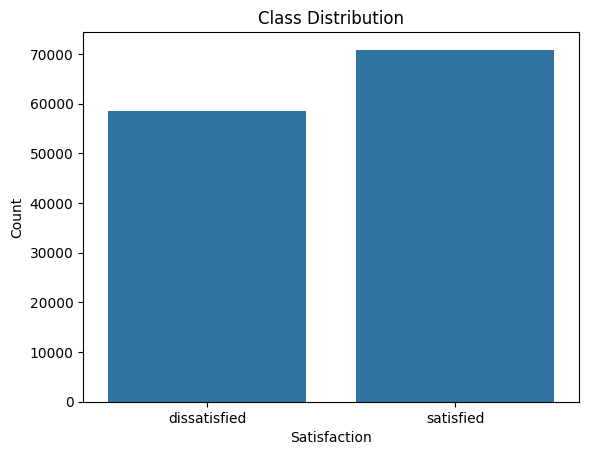

In [18]:
sns.countplot(data=df_subset, x='satisfaction')
plt.title('Class Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['dissatisfied', 'satisfied'])
plt.show()

#### Functions for visualizing class distributions in training and test sets

In [19]:
# Function for visualizing class distributions in training and test sets
def visualize_distributions(y_train, y_test):

    # Combine data into a DataFrame for visualization
    data = pd.DataFrame({
        'Labels': pd.concat([y_train, y_test], axis=0),
        'Dataset': ['Train'] * len(y_train) + ['Test'] * len(y_test)
    })

    # Create the plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    for idx, dataset in enumerate(['Train', 'Test']):
        sns.countplot(data=data[data['Dataset'] == dataset], x='Labels', ax=ax[idx])
        ax[idx].set_title(f'{dataset} Label Distribution')
        ax[idx].set_xlabel(f'{dataset} Labels')
        ax[idx].set_ylabel('Count')
        ax[idx].set_xticks(ticks=[0, 1], labels=['dissatisfied', 'satisfied'])

    plt.tight_layout()
    plt.show()


#### Isolate label variable and features

In [20]:
y = df_subset["satisfaction"]

X = df_subset.copy()
X = X.drop("satisfaction", axis = 1)

### 3.1. Split data with train/test ratio: 40/60

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0, shuffle=True, stratify=y)

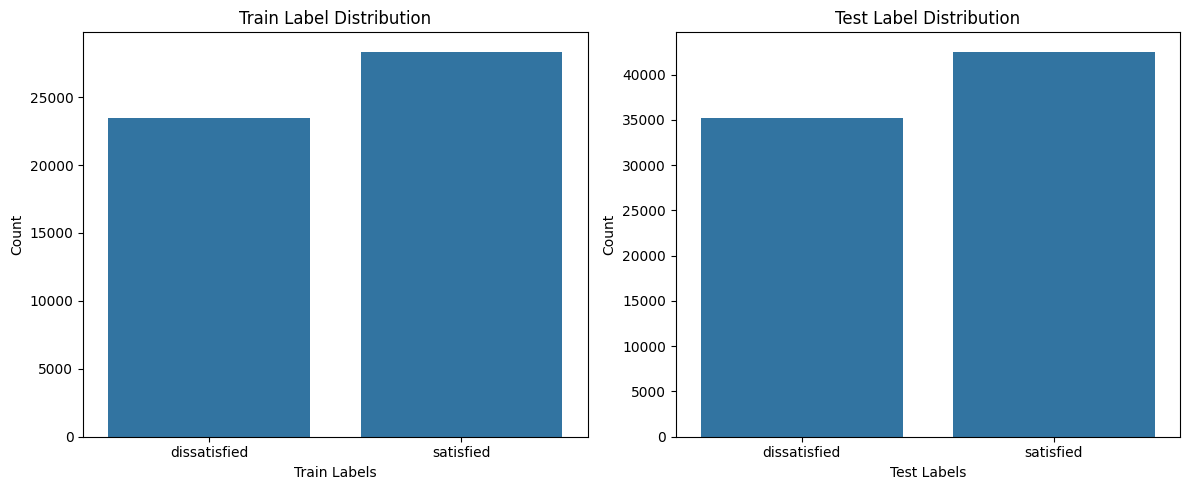

In [24]:
# Visualize the class distributions in the training set and test set
visualize_distributions(y_train, y_test)

### 3.2. Split data with train/test ratio: 60/40

In [25]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.4, random_state=0, shuffle=True, stratify=y)

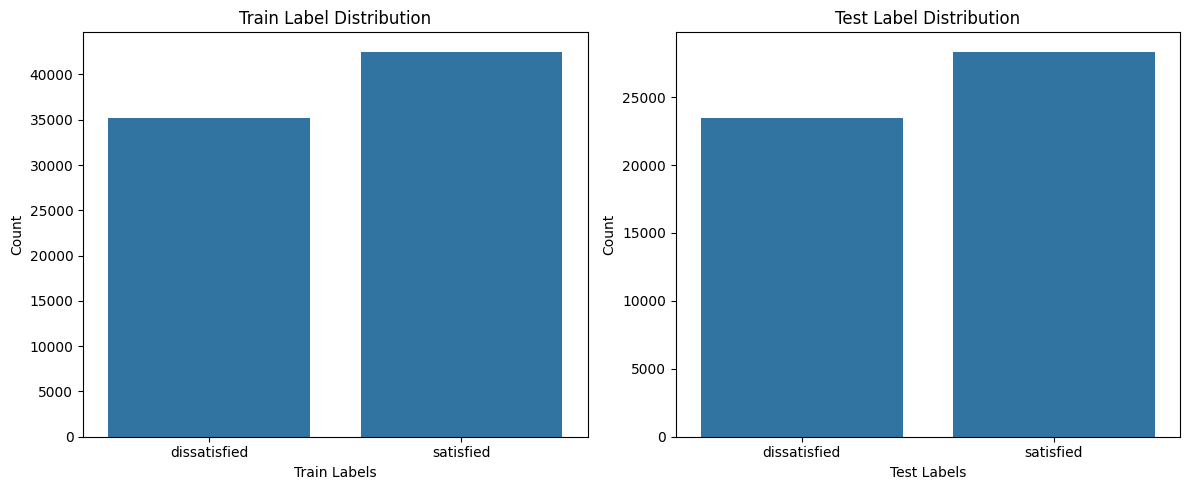

In [26]:
# Visualize the class distributions in the training set and test set
visualize_distributions(y_train_2, y_test_2)

### 3.3. Split data with train/test ratio: 80/20

In [27]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

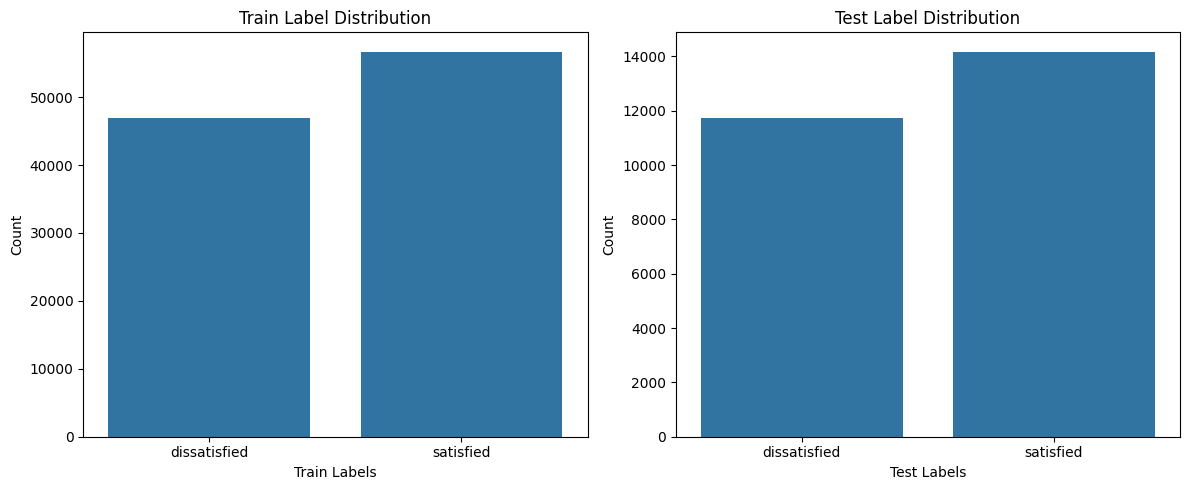

In [28]:
# Visualize the class distributions in the training set and test set
visualize_distributions(y_train_3, y_test_3)

### 3.4. Split data with train/test ratio: 90/10

In [29]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=True, stratify=y)

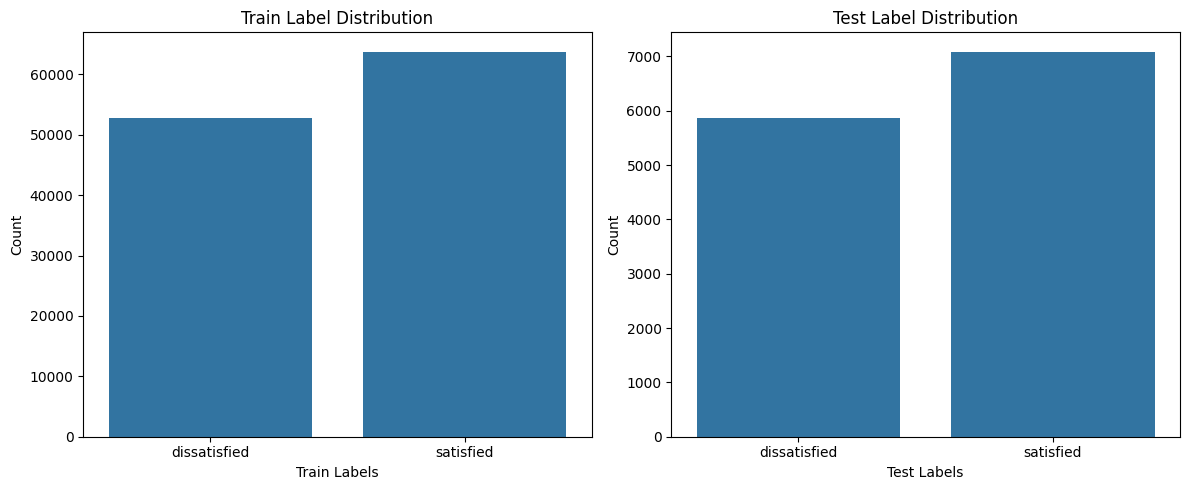

In [30]:
# Visualize the class distributions in the training set and test set
visualize_distributions(y_train_4, y_test_4)

# II. Building and Visualizing the Decision Tree Classifiers
## 1. For the the dataset 1 (40/60)

### 1.1. Build the Decison Tree Classifier

In [31]:
# Instantiate the model
decision_tree_1 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 1.2. Visualizing the Decision Tree Classifier

In [34]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_1,
                feature_names=X_train.columns,
                class_names=['dissatisfied', 'satisfied'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)

# Ensure the directory exists
output_dir = "./Decision Tree/40_60"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.267529 to fit


Decision tree saved as PDF and/or SVG in ./Decision Tree/40_60.


## 2. For the dataset 2 (60/40)

### 2.1. Build the Decison Tree Classifier

In [32]:
# Instantiate the model
decision_tree_2 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 2.2. Visualizing the Decision Tree Classifier

In [33]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_2,
                feature_names=X_train.columns,
                class_names=['dissatisfied', 'satisfied'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)

# Ensure the directory exists
output_dir = "./Decision Tree/60_40"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.202968 to fit


Decision tree saved as PDF and/or SVG in ./Decision Tree/60_40.


## 3. For the dataset 3 (80/20)

### 3.1. Build the Decison Tree Classifier

In [33]:
# Instantiate the model
decision_tree_3 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_3.fit(X_train_3, y_train_3)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 3.2. Visualizing the Decision Tree Classifier

In [35]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_3,
                feature_names=X_train.columns,
                class_names=['dissatisfied', 'satisfied'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)

# Ensure the directory exists
output_dir = "./Decision Tree/80_20"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.157053 to fit


Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20.


## 4. For the dataset 4 (90/10)

### 4.1. Build the Decison Tree Classifier

In [34]:
# Instantiate the model
decision_tree_4 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_4.fit(X_train_4, y_train_4)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 4.2. Visualizing the Decision Tree Classifier

In [37]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_4,
                feature_names=X_train.columns,
                class_names=['dissatisfied', 'satisfied'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)

# Ensure the directory exists
output_dir = "./Decision Tree/90_10"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.146002 to fit


Decision tree saved as PDF and/or SVG in ./Decision Tree/90_10.


# III. Evaluating the decision tree classifiers

#### Function for plotting the confusion matrix

In [35]:
def conf_matrix_plot(model, y_pred, y_data, display_labels):
    '''
    Accepts as argument model object, y_pred, and y data (label test). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 

    cm = confusion_matrix(y_data, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=display_labels)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

## 1. For the the dataset 1 (40/60)

In [36]:
label_pred_1 = decision_tree_1.predict(X_test)

### 1.1. Create the classification report

In [38]:
# Create the classification report
target_labels = ['dissatisfied', 'satisfied']
print(classification_report(y_test, label_pred_1, target_names=target_labels))

              precision    recall  f1-score   support

dissatisfied       0.92      0.92      0.92     35106
   satisfied       0.94      0.94      0.94     42587

    accuracy                           0.93     77693
   macro avg       0.93      0.93      0.93     77693
weighted avg       0.93      0.93      0.93     77693



### 1.2. Create the confusion matrix

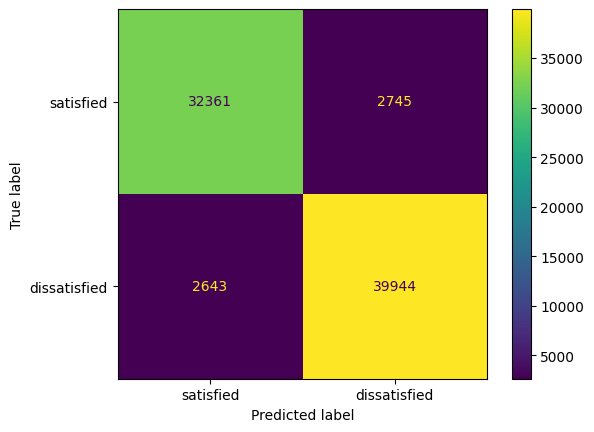

In [42]:
# Create the confusion matrix
display_labels = ['dissatisfied', 'satisfied']
conf_matrix_plot(decision_tree_1, label_pred_1, y_test, display_labels)

### 1.3. Interpretation

#### **Interpretation of Results**

---

##### **First Image: Classification Report**
The classification report provides key metrics for evaluating the performance of the decision tree model.

###### **Metrics for Each Class**:
- **Precision**: Indicates how many of the predicted labels for a class are actually correct.
  - **Satisfied**: 92% of the predicted "satisfied" labels are correct.
  - **Dissatisfied**: 94% of the predicted "dissatisfied" labels are correct.
- **Recall**: Indicates how many of the actual labels for a class were correctly predicted.
  - **Satisfied**: The model correctly identified 92% of the actual "satisfied" instances.
  - **Dissatisfied**: The model correctly identified 94% of the actual "dissatisfied" instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
  - **Satisfied**: F1-score is 0.92.
  - **Dissatisfied**: F1-score is 0.94.

###### **Overall Metrics**:
- **Accuracy**: The model achieved 93% accuracy, meaning 93% of all predictions were correct.
- **Macro Avg**: The unweighted average of precision, recall, and F1-score across all classes. It’s 93%.
- **Weighted Avg**: Averages the metrics across classes, weighted by the number of instances in each class. It’s also 93%, reflecting good balance.

---

##### **Second Image: Confusion Matrix**
The confusion matrix provides a breakdown of the model's predictions compared to the true labels:

###### **Structure**:
- Rows represent the true class labels.
- Columns represent the predicted class labels.

###### **Values**:
- **True Positives (TP)**: 32,361 instances were correctly predicted as `satisfied`.
- **True Negatives (TN)**: 39,944 instances were correctly predicted as `dissatisfied`.
- **False Positives (FP)**: 2,643 instances of `dissatisfied` were incorrectly predicted as `satisfied`.
- **False Negatives (FN)**: 2,745 instances of `satisfied` were incorrectly predicted as `dissatisfied`.

###### **Interpretation**:
- The model has slightly better performance for the `dissatisfied` class compared to `satisfied`, as seen in both the confusion matrix and classification report.
- Most predictions are concentrated along the diagonal, indicating high overall accuracy.
- Misclassifications are relatively small compared to the total number of instances.

---

##### **Summary**:
- The **classification report** provides an excellent quantitative summary of the model's performance, showing balanced metrics for both classes.
- The **confusion matrix** visualizes the distribution of true vs. predicted labels, highlighting areas where the model struggles (e.g., misclassification between classes).

---


## 2. For the the dataset 2 (60/40)

In [43]:
label_pred_2 = decision_tree_2.predict(X_test_2)

### 2.1. Create the classification report

In [44]:
# Create the classification report
target_labels = ['dissatisfied', 'satisfied']
print(classification_report(y_test_2, label_pred_2, target_names=target_labels))

              precision    recall  f1-score   support

   satisfied       0.93      0.93      0.93     23401
dissatisfied       0.94      0.94      0.94     28394

    accuracy                           0.93     51795
   macro avg       0.93      0.93      0.93     51795
weighted avg       0.93      0.93      0.93     51795



### 2.2. Create the confusion matrix

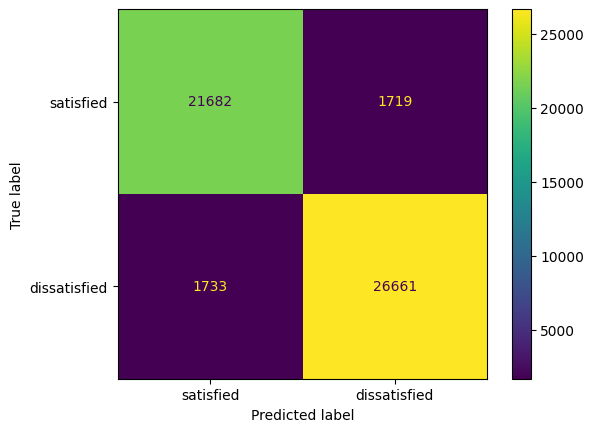

In [45]:
# Create the confusion matrix
display_labels = ['dissatisfied', 'satisfied']
conf_matrix_plot(decision_tree_2, label_pred_2, y_test_2, display_labels)

### 2.3. Interpretation

#### **Interpretation of Results**

---

##### **First Image: Classification Report**
The classification report provides key metrics for evaluating the performance of the decision tree model.

###### **Metrics for Each Class**:
- **Precision**: Indicates how many of the predicted labels for a class are actually correct.
  - **Satisfied**: 93% of the predicted "satisfied" labels are correct.
  - **Dissatisfied**: 94% of the predicted "dissatisfied" labels are correct.
- **Recall**: Shows how many of the actual labels for a class were correctly predicted.
  - **Satisfied**: The model correctly identified 93% of the actual "satisfied" instances.
  - **Dissatisfied**: The model correctly identified 94% of the actual "dissatisfied" instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
  - **Satisfied**: F1-score is 0.93.
  - **Dissatisfied**: F1-score is 0.94.

###### **Overall Metrics**:
- **Accuracy**: The model achieved 93% accuracy, meaning 93% of all predictions were correct.
- **Macro Avg**: The unweighted average of precision, recall, and F1-score across all classes. It’s 93%.
- **Weighted Avg**: Averages the metrics across classes, weighted by the number of instances in each class. It’s also 93%, reflecting good balance.

---

##### **Second Image: Confusion Matrix**
The confusion matrix provides a breakdown of the model's predictions compared to the true labels:

###### **Structure**:
- Rows represent the true class labels.
- Columns represent the predicted class labels.

###### **Values**:
- **True Positives (TP)**: 21,682 instances were correctly predicted as `satisfied`.
- **True Negatives (TN)**: 26,661 instances were correctly predicted as `dissatisfied`.
- **False Positives (FP)**: 1,733 instances of `dissatisfied` were incorrectly predicted as `satisfied`.
- **False Negatives (FN)**: 1,719 instances of `satisfied` were incorrectly predicted as `dissatisfied`.

###### **Interpretation**:
- The model has similar performance for both the `satisfied` and `dissatisfied` classes, as seen in both the confusion matrix and classification report.
- Most predictions are concentrated along the diagonal, indicating high overall accuracy.
- Misclassifications are relatively small compared to the total number of instances, but there is still room for improvement.

---

##### **Summary**:
- The **classification report** shows balanced and high metrics for both classes, with an overall accuracy of 93%.
- The **confusion matrix** visualizes the distribution of true vs. predicted labels, showing good prediction accuracy for both classes and minor misclassifications.


## 3. For the the dataset 3 (80/20)

In [46]:
label_pred_3 = decision_tree_3.predict(X_test_3)

### 3.1. Create the classification report

In [47]:
# Create the classification report
target_labels = ['dissatisfied', 'satisfied']
print(classification_report(y_test_3, label_pred_3, target_names=target_labels))

              precision    recall  f1-score   support

   satisfied       0.93      0.93      0.93     11711
dissatisfied       0.94      0.94      0.94     14187

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



### 3.2. Create the confusion matrix

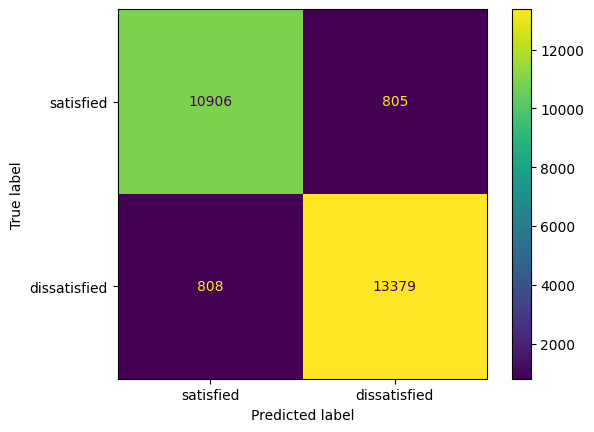

In [48]:
# Create the confusion matrix
display_labels = ['dissatisfied', 'satisfied']
conf_matrix_plot(decision_tree_3, label_pred_3, y_test_3, display_labels)

### 3.3. Interpretation

#### **Interpretation of Results**

---

##### **First Image: Classification Report**
The classification report provides key metrics for evaluating the performance of the decision tree model.

###### **Metrics for Each Class**:
- **Precision**: Indicates how many of the predicted labels for a class are actually correct.
  - **Satisfied**: 93% of the predicted "satisfied" labels are correct.
  - **Dissatisfied**: 94% of the predicted "dissatisfied" labels are correct.
- **Recall**: Shows how many of the actual labels for a class were correctly predicted.
  - **Satisfied**: The model correctly identified 93% of the actual "satisfied" instances.
  - **Dissatisfied**: The model correctly identified 94% of the actual "dissatisfied" instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
  - **Satisfied**: F1-score is 0.93.
  - **Dissatisfied**: F1-score is 0.94.

###### **Overall Metrics**:
- **Accuracy**: The model achieved 94% accuracy, meaning 94% of all predictions were correct.
- **Macro Avg**: The unweighted average of precision, recall, and F1-score across all classes. It’s 94%.
- **Weighted Avg**: Averages the metrics across classes, weighted by the number of instances in each class. It’s also 94%, reflecting good balance.

---

##### **Second Image: Confusion Matrix**
The confusion matrix provides a breakdown of the model's predictions compared to the true labels:

###### **Structure**:
- Rows represent the true class labels.
- Columns represent the predicted class labels.

###### **Values**:
- **True Positives (TP)**: 10,906 instances were correctly predicted as `satisfied`.
- **True Negatives (TN)**: 13,379 instances were correctly predicted as `dissatisfied`.
- **False Positives (FP)**: 808 instances of `dissatisfied` were incorrectly predicted as `satisfied`.
- **False Negatives (FN)**: 805 instances of `satisfied` were incorrectly predicted as `dissatisfied`.

###### **Interpretation**:
- The model performs very well for both classes, with slightly better precision, recall, and F1-score for the `dissatisfied` class.
- Most predictions are concentrated along the diagonal, indicating high accuracy.
- The number of misclassifications (both FP and FN) is relatively small compared to the total number of instances.

---

##### **Summary**:
- The **classification report** demonstrates excellent performance, with high and balanced metrics for both classes.
- The **confusion matrix** visually confirms the model's high accuracy, with only a small number of misclassifications.


## 4. For the the dataset 4 (90/10)

In [49]:
label_pred_4 = decision_tree_4.predict(X_test_4)

### 4.1. Create the classification report

In [50]:
# Create the classification report
target_labels = ['dissatisfied', 'satisfied']
print(classification_report(y_test_4, label_pred_4, target_names=target_labels))

              precision    recall  f1-score   support

   satisfied       0.93      0.92      0.93      5882
dissatisfied       0.94      0.94      0.94      7067

    accuracy                           0.93     12949
   macro avg       0.93      0.93      0.93     12949
weighted avg       0.93      0.93      0.93     12949



### 4.2. Create the confusion matrix

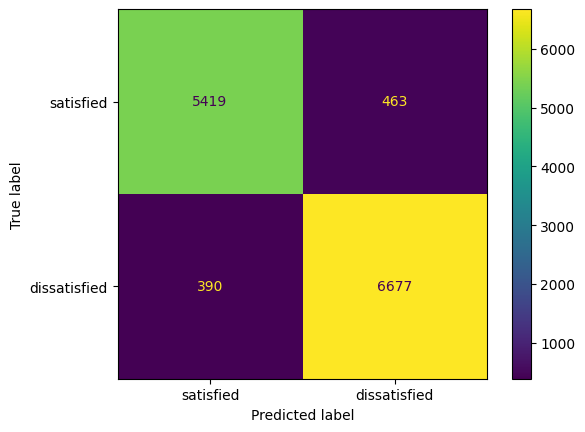

In [51]:
# Create the confusion matrix
display_labels = ['dissatisfied', 'satisfied']
conf_matrix_plot(decision_tree_4, label_pred_4, y_test_4, display_labels)

### 4.3. Interpretation

#### **Interpretation of Results**

---

##### **First Image: Classification Report**
The classification report provides key metrics for evaluating the performance of the decision tree model.

###### **Metrics for Each Class**:
- **Precision**: Indicates how many of the predicted labels for a class are actually correct.
  - **Satisfied**: 93% of the predicted "satisfied" labels are correct.
  - **Dissatisfied**: 94% of the predicted "dissatisfied" labels are correct.
- **Recall**: Shows how many of the actual labels for a class were correctly predicted.
  - **Satisfied**: The model correctly identified 92% of the actual "satisfied" instances.
  - **Dissatisfied**: The model correctly identified 94% of the actual "dissatisfied" instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
  - **Satisfied**: F1-score is 0.93.
  - **Dissatisfied**: F1-score is 0.94.

###### **Overall Metrics**:
- **Accuracy**: The model achieved 93% accuracy, meaning 93% of all predictions were correct.
- **Macro Avg**: The unweighted average of precision, recall, and F1-score across all classes. It’s 93%.
- **Weighted Avg**: Averages the metrics across classes, weighted by the number of instances in each class. It’s also 93%, reflecting good balance.

---

##### **Second Image: Confusion Matrix**
The confusion matrix provides a breakdown of the model's predictions compared to the true labels:

###### **Structure**:
- Rows represent the true class labels.
- Columns represent the predicted class labels.

###### **Values**:
- **True Positives (TP)**: 5419 instances were correctly predicted as `satisfied`.
- **True Negatives (TN)**: 6677 instances were correctly predicted as `dissatisfied`.
- **False Positives (FP)**: 390 instances of `dissatisfied` were incorrectly predicted as `satisfied`.
- **False Negatives (FN)**: 463 instances of `satisfied` were incorrectly predicted as `dissatisfied`.

###### **Interpretation**:
- The model shows strong performance for both classes, with slightly better recall and precision for the `dissatisfied` class.
- Most predictions are concentrated along the diagonal, confirming high accuracy.
- Misclassifications are minimal relative to the total number of instances.

---

##### **Summary**:
- The **classification report** demonstrates high and balanced performance metrics, with an overall accuracy of 93%.
- The **confusion matrix** confirms this performance visually, with very few misclassifications for both classes.


## 5. Insights 

#### **Insights into the Performance of the Decision Tree Classifiers**

---

##### **1. High Accuracy Across Models**:
- The decision tree classifiers consistently achieve high accuracy values, ranging from **93% to 94%** across all datasets. 
- This indicates that the models are generally well-fitted to the data and capable of making accurate predictions.

##### **2. Balanced Precision and Recall**:
- Both **precision** and **recall** are consistently balanced across the models, with values close to or above **93%** for both classes (`satisfied` and `dissatisfied`).
- This demonstrates that the classifiers perform well in:
  - **Precision**: Correctly identifying the predicted positive cases.
  - **Recall**: Accurately capturing the true positive cases.

##### **3. Class-wise Performance**:
- The models slightly favor the `dissatisfied` class, with marginally higher recall and precision compared to the `satisfied` class.
- This might indicate that the classifiers are slightly more sensitive to identifying dissatisfied instances, which may be advantageous in scenarios where identifying dissatisfied customers is critical.

##### **4. Minimal Misclassifications**:
- The confusion matrices show that most predictions fall along the diagonal, indicating accurate predictions.
- However, there are a few **false positives (FP)** and **false negatives (FN)**:
  - The misclassifications are relatively low compared to the total number of instances, suggesting that the models are reliable.

##### **5. Scalability Across Subsets**:
- The classifiers maintain consistent performance even when evaluated on smaller subsets of the data (as seen in the later confusion matrices and classification reports).
- This indicates that the decision tree models generalize well across different data sizes.

##### **6. Interpretability and Bias**:
- Decision trees are inherently interpretable, making it easy to trace how the predictions are made.
- The balanced metrics suggest that there is no significant bias toward either class.

---

#### **Strengths**:
- High **accuracy**, **precision**, **recall**, and **F1-scores** across all models.
- Minimal misclassifications indicate strong generalization.
- Balanced performance across `satisfied` and `dissatisfied` classes ensures fairness.
- Consistent results across varying dataset sizes highlight the model's robustness.

---

#### **Areas for Improvement**:
1. **Reducing Misclassifications**:
   - Although minimal, the **false positives** and **false negatives** could still be improved by:
     - Fine-tuning hyperparameters (e.g., max depth, minimum samples per split).
     - Experimenting with ensemble methods (e.g., Random Forests or Gradient Boosted Trees) to enhance performance.

2. **Overfitting Risk**:
   - Decision trees can overfit if not properly regularized. Monitoring for overfitting and employing pruning techniques might help maintain performance on unseen data.

3. **Feature Importance Analysis**:
   - Investigating feature importance could help identify which features are most influential in predicting satisfaction levels. This could also guide future feature engineering efforts.

---

#### **Conclusion**:
The decision tree classifiers exhibit excellent performance across all metrics, with balanced precision, recall, and F1-scores. The models generalize well across different data sizes and show minimal bias between the two classes. However, fine-tuning and exploring ensemble methods could further reduce misclassifications and improve robustness for even better results.


# IV. The depth and accuracy of a decision tree

This task focuses on the 80/20 training and test sets

In [52]:
feature_train = X_train_3.copy()
feature_test = X_test_3.copy()
label_train = y_train_3.copy()
label_test = y_test_3.copy()

accuracy_scores = []

In [58]:
def evaluate_decision_tree(feature_train, label_train, feature_test, label_test, max_depth):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=0)
    dt.fit(feature_train, label_train)
    label_pred = dt.predict(feature_test)
    acc_score = accuracy_score(y_true=label_test, y_pred=label_pred)
    dot_data = export_graphviz(dt,
                feature_names=feature_train.columns,
                class_names=['dissatisfied', 'satisfied'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
    graph = graphviz.Source(dot_data)

    return acc_score, graph

## 1. max_depth = None

In [59]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, None)
accuracy_scores.append(acc_score)

In [60]:
output_dir = "./Decision Tree/80_20_Depth/None"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.157053 to fit


Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/None.


## 2. max_depth = 2

In [61]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 2)
accuracy_scores.append(acc_score)

In [62]:
output_dir = "./Decision Tree/80_20_Depth/2"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/2.


## 3. max_depth = 3

In [63]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 3)
accuracy_scores.append(acc_score)

In [64]:
output_dir = "./Decision Tree/80_20_Depth/3"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/3.


## 4. max_depth = 4

In [65]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 4)
accuracy_scores.append(acc_score)

In [66]:
output_dir = "./Decision Tree/80_20_Depth/4"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/4.


## 5. max_depth = 5

In [67]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 5)
accuracy_scores.append(acc_score)

In [68]:
output_dir = "./Decision Tree/80_20_Depth/5"
os.makedirs(output_dir, exist_ok=True)['dissatisfied', 'satisfied']
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/5.


## 6. max_depth = 6

In [69]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 6)
accuracy_scores.append(acc_score)

In [70]:
output_dir = "./Decision Tree/80_20_Depth/6"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/6.


## 7. max_depth = 7

In [71]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 7)
accuracy_scores.append(acc_score)

In [72]:
output_dir = "./Decision Tree/80_20_Depth/7"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/7.


## Accuracy_score table

In [81]:
print(accuracy_scores)
max_depth_values = ['None', 2, 3, 4, 5, 6, 7]
accuracy_table = pd.DataFrame({
    'max_depth': max_depth_values,
    'Accuracy': accuracy_scores
})
accuracy_table

[0.9377171982392463, 0.8258552783998765, 0.8457023708394471, 0.8560120472623368, 0.8694879913506834, 0.8848945864545524, 0.9057842304425052]


,max_depth,Accuracy
0,None,0.937717
1,2,0.825855
2,3,0.845702
3,4,0.856012
4,5,0.869488
5,6,0.884895
6,7,0.905784


## Chart plotting the accuracy scores

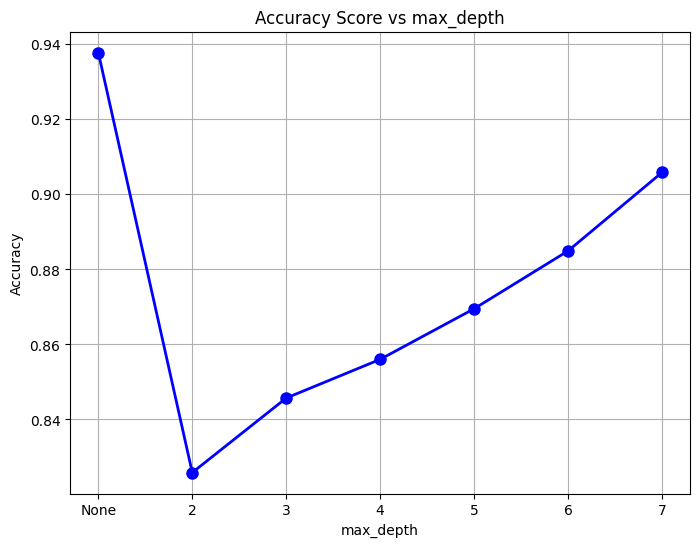

In [82]:
accuracy_scores = accuracy_scores[1:] + [accuracy_scores[0]]
max_depth_values = [2, 3, 4, 5, 6, 7, 'None']
tickvalues = range(0,len(max_depth_values))

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Accuracy Score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(ticks=tickvalues, labels=max_depth_values)
plt.show()

## Insights

#### **Insights on the Statistics of Decision Tree Classifier Accuracy**

---

##### **1. Impact of `max_depth` on Accuracy**:
- The accuracy starts very high when `max_depth` is set to `None` (no limit), achieving an accuracy of **0.9377**. This suggests the model is likely overfitting, as it has no constraints and can perfectly fit the training data, but it may not generalize well.
- For shallow trees (`max_depth=2`), the accuracy drops significantly to **0.8259**. This is likely because the model is underfitting, as it cannot capture enough complexity in the data.

---

##### **2. Performance Trends**:
- As `max_depth` increases, the accuracy steadily improves, moving from **0.8259** at `max_depth=2` to **0.9058** at `max_depth=7`.
- This trend indicates that increasing the tree depth allows the model to better capture the data's complexity, reducing underfitting.

---

##### **3. Sweet Spot for `max_depth`**:
- From the trend, a good balance between underfitting and overfitting seems to occur at `max_depth=6` or `7`, where the model achieves a high accuracy of **0.9058** without overfitting as significantly as the unrestricted tree (`max_depth=None`).

---

##### **4. Accuracy Visualization**:
- The graph shows a steep drop from `max_depth=None` to `2`, followed by a consistent upward trend as `max_depth` increases.
- The steady improvement suggests that the model benefits from deeper trees, up to a certain point, without severely overfitting.

---

##### **5. Trade-off Between Complexity and Performance**:
- **Very low `max_depth` values** (e.g., `max_depth=2`) restrict the model too much, leading to underfitting.
- **No depth limit (`max_depth=None`)** allows the model to overfit, leading to high accuracy but at the cost of poor generalization.
- The optimal depth range appears to be **5 to 7**, balancing generalization and performance.

---

#### **Recommendations**:
1. **Optimal `max_depth`**:
   - Set `max_depth` to **6** or **7**, as it provides the best balance between accuracy and overfitting.
   
2. **Validation Techniques**:
   - Use cross-validation to confirm that the observed trends hold across multiple splits of the data.

3. **Further Experiments**:
   - Consider additional hyperparameter tuning (e.g., minimum samples per split, minimum leaf size) to further refine the model's performance.
   - Experiment with ensemble methods like Random Forest or Gradient Boosted Trees, as they can handle overfitting and underfitting better.

---

#### **Conclusion**:
The reported statistics demonstrate the importance of tuning `max_depth` in decision tree classifiers. A balanced depth (e.g., 6 or 7) maximizes accuracy while avoiding overfitting or underfitting, making it a key hyperparameter for optimizing the model's performance.
